# Creating Networks

In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 
import ast

In [11]:
df = pd.read_csv("df_sentences_filtered.csv", index_col = 0)

In [12]:
df.head()

,entities,character_entity
sentence,,
"The Allies, known initially as ""The Triple Entente"", comprised the British Empire, France, and Russia.","['The Triple Entente', 'the British Empire', '...","['france', 'russia']"
"Germany, Austria-Hungary, Bulgaria, and later the Ottoman Empire, were known as ""The Central Powers"".[3][4]\n","['Germany', 'Austria-Hungary', 'Bulgaria', 'th...","['germany', 'bulgaria']"
"In 1917, Russia ended hostile actions against the Central Powers after the fall of the Tsar.","['1917', 'Russia', 'the Central Powers', 'Tsar']",['russia']
"The Bolsheviks negotiated the Treaty of Brest-Litovsk with Germany, although it was a huge cost to Russia.","['Bolsheviks', 'the Treaty of Brest-Litovsk', ...","['germany', 'russia']"
"In the treaty, Bolshevik Russia ceded the Baltic states to Germany, and its province of Kars Oblast in the South Caucasus to the Ottoman Empire.","['Bolshevik Russia', 'Baltic', 'Germany', 'Kar...",['germany']


In [15]:
# Convert string representations of lists in the 'character_entity' column to actual lists
df['character_entity'] = df['character_entity'].apply(ast.literal_eval)

In [16]:
# Extract edges from the character_entity column
edges = [tuple(entities) for entities in df['character_entity'] if len(entities) == 2]

In [17]:
# Create the network graph
G = nx.Graph()
G.add_edges_from(edges)

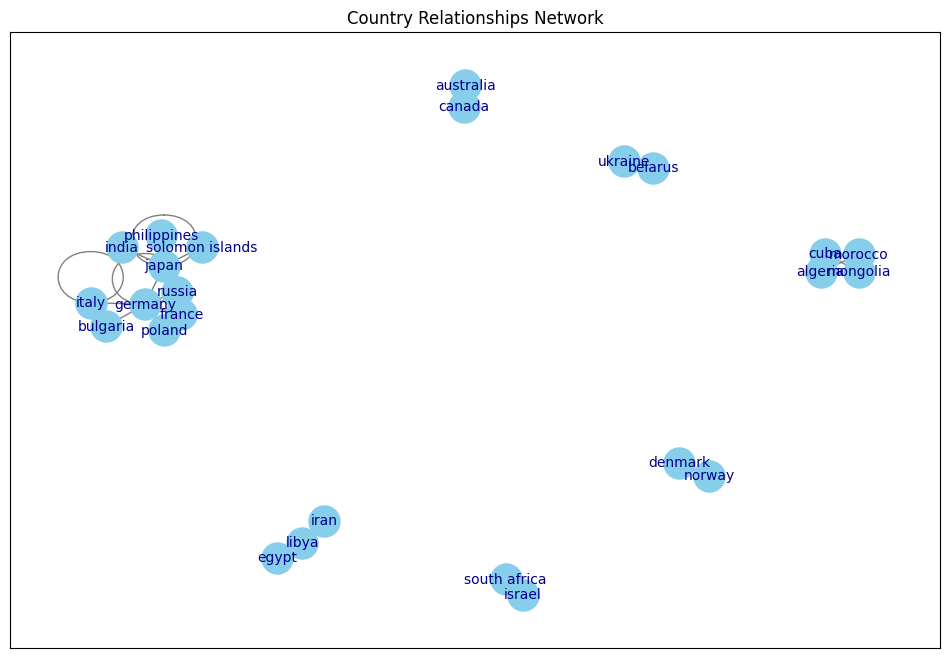

In [18]:
# Plot the static network graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=True, node_size=500, node_color="skyblue", 
                 font_size=10, font_color="darkblue", edge_color="gray")
plt.title("Country Relationships Network")
plt.show()

In [19]:
# Create the NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Convert NetworkX graph to a Pyvis network for visualization
net = Network(notebook=True)
net.from_nx(G)

# Customize options if desired
net.set_options("""
var options = {
  "nodes": {
    "color": {
      "highlight": {
        "background": "yellow",
        "border": "red"
      }
    }
  },
  "edges": {
    "color": {
      "color": "gray",
      "highlight": "blue"
    },
    "smooth": {
      "type": "continuous"
    }
  }
}
""")

# Save as an interactive HTML file
output_file = "country_relationships_network.html"
net.save_graph(output_file)

print(f"Interactive network graph saved as {output_file}")

Interactive network graph saved as country_relationships_network.html


In [36]:
# Add edges to the graph for 'Ally' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Ally'], relationship='Ally')

# Add edges to the graph for 'Trade_Partner' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Trade_Partner'], relationship='Trade Partner')

# Step 4: Create a Pyvis network object
net = Network(notebook=True)

# Step 5: Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Step 6: Customize the network
# Adding nodes and edges with labels
for node in G.nodes(data=True):
    net.add_node(node[0], label=node[0])  # Add country names as labels

for edge in G.edges(data=True):
    relationship = edge[2]['relationship']
    net.add_edge(edge[0], edge[1], title=relationship)  # Use title for displaying relationship on hover

# Step 7: Customize the appearance
net.set_options("""
var options = {
  "height": "800px",
  "width": "100%",
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -8000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09,
      "avoidOverlap": 1
    }
  },
  "manipulation": {
    "enabled": false
  },
  "nodes": {
    "shape": "dot",
    "size": 20,
    "color": {
      "border": "rgba(0, 0, 0, 0.8)",
      "background": "rgba(135, 206, 235, 0.8)"
    },
    "font": {
      "color": "black",
      "size": 14,
      "face": "arial",
      "strokeWidth": 2
    }
  },
  "edges": {
    "smooth": {
      "enabled": true,
      "type": "continuous",
      "roundness": 0.5
    },
    "color": {
      "color": "rgba(0, 0, 0, 0.5)",
      "highlight": "rgba(255, 0, 0, 1)",
      "hover": "rgba(255, 0, 0, 1)"
    }
  }
}
""")

# Step 8: Save the network as an HTML file
net.save_graph("country_relationships_network.html")

print("Interactive network graph saved as 'country_relationships_network.html'")

Interactive network graph saved as 'country_relationships_network.html'


In [20]:
!pip install leidenalg igraph

In [22]:
import leidenalg as la
import igraph as ig


# Create the NetworkX graph
G_nx = nx.Graph()
G_nx.add_edges_from(edges)

# Convert NetworkX graph to an iGraph graph for community detection
G_ig = ig.Graph.TupleList(edges, directed=False)

# Apply the Leiden algorithm
partition = la.find_partition(G_ig, la.CPMVertexPartition, resolution_parameter=0.1)

# Map detected communities back to NetworkX nodes
community_dict = {node: part for part, community in enumerate(partition) for node in community}
nx.set_node_attributes(G_nx, community_dict, 'community')

# Convert NetworkX graph to a Pyvis network for visualization
net = Network(notebook=True)
net.from_nx(G_nx)

# Apply community-based coloring in the Pyvis network
for node in net.nodes:
    # Use node['id'] if it exists in community_dict
    community_id = community_dict.get(node['id'])
    if community_id is not None:
        # Apply unique color based on community ID
        node['color'] = f"hsl({community_id * 137 % 360}, 80%, 70%)"
    else:
        node['color'] = 'gray'  # Default color if community not found

# Save as an interactive HTML file
output_file = "country_relationships_communities.html"
net.save_graph(output_file)

print(f"Interactive community network graph saved as {output_file}")

Interactive community network graph saved as country_relationships_communities.html


Community Detection:
The Leiden algorithm divided the countries into distinct communities, which reflect alliances, geographic proximity, or historical relationships. For instance:

Europe-focused communities: Western European countries (like France and Germany) often appear in one community, hinting at alliances and interactions, particularly due to their roles in world wars.
Asia-focused connections: Countries like Japan and Russia might form separate or overlapping clusters, given historical tensions and alliances in Asia.
Colonial influences: Some clusters reflect colonial histories, such as connections between former colonies and European powers.
Historical Relevance:
This partitioning aligns with historical events, such as alliances in the World Wars and post-colonial connections. This graph helps visualize how historical and geopolitical factors drive lasting connections between countries.

Further Conclusions:
Proximity and Conflict: Countries in close geographical proximity or those involved in historical conflicts often share the same communities.
Trade and Diplomatic Ties: Communities could also represent economic alliances and diplomacy. Observing which countries remain isolated or connected might help analyze present-day international relations.

In [24]:
# Create the NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Step 1: Calculate Centrality Measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Step 2: Print Centrality Scores
print("Degree Centrality Scores:")
for node, score in degree_centrality.items():
    print(f"{node}: {score}")

print("\nCloseness Centrality Scores:")
for node, score in closeness_centrality.items():
    print(f"{node}: {score}")

print("\nBetweenness Centrality Scores:")
for node, score in betweenness_centrality.items():
    print(f"{node}: {score}")

Degree Centrality Scores:
france: 0.125
russia: 0.125
germany: 0.3333333333333333
bulgaria: 0.041666666666666664
poland: 0.08333333333333333
norway: 0.041666666666666664
denmark: 0.041666666666666664
ukraine: 0.041666666666666664
belarus: 0.041666666666666664
libya: 0.08333333333333333
egypt: 0.041666666666666664
japan: 0.29166666666666663
italy: 0.125
morocco: 0.041666666666666664
algeria: 0.041666666666666664
philippines: 0.041666666666666664
solomon islands: 0.041666666666666664
india: 0.041666666666666664
south africa: 0.041666666666666664
israel: 0.041666666666666664
iran: 0.041666666666666664
mongolia: 0.041666666666666664
cuba: 0.041666666666666664
canada: 0.041666666666666664
australia: 0.041666666666666664

Closeness Centrality Scores:
france: 0.1875
russia: 0.22499999999999998
germany: 0.28125
bulgaria: 0.16875
poland: 0.17763157894736842
norway: 0.041666666666666664
denmark: 0.041666666666666664
ukraine: 0.041666666666666664
belarus: 0.041666666666666664
libya: 0.08333333333

## Degree Centrality

#### Top Nodes: Germany (0.333) and Japan (0.292) exhibit the highest degree centrality, indicating that they have a significant number of direct connections with other nodes in the graph.

#### Low Centrality: Many countries like Bulgaria, Norway, and others have very low degree centrality (around 0.041), suggesting they are less connected within the network.

#### Implications: Countries with high degree centrality could be viewed as more influential or prominent within the network, likely engaging in more interactions or relationships with other entities.

## Closeness Centrality

#### Top Nodes: The highest closeness centrality scores are seen in Germany (0.281) and Japan (0.260). These countries can reach other nodes more quickly than others, indicating a strategic advantage in spreading information or resources.

#### Low Centrality: Countries like Norway, Denmark, and others again show very low scores (around 0.041), meaning they are more distant from the majority of the network.

#### Implications: High closeness centrality suggests that a country can effectively manage and coordinate with others, potentially leading to faster responses in collaborative situations.

## Betweenness Centrality

#### Top Nodes: Germany (0.078) and Japan (0.076) again emerge as key players, indicating they serve as important bridges between other nodes in the network. This can imply a strategic role in communication and resource flow.

#### Zero Scores: A considerable number of countries (e.g., Bulgaria, Poland, Norway) have a betweenness centrality of 0, meaning they do not serve as intermediaries in any connections. This could suggest isolation or lack of influence in the network.

#### Implications: Countries with high betweenness centrality may have significant control over the flow of information or resources, thus playing a critical role in negotiations or collaborations.